<style>
  .redText{
    color:red;
  }
</style>


<h1>Importing  necessary Libraries<h1>

In [1]:
#importing libs
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
drive.mount("/content/drive")


Mounted at /content/drive


<h1>Importinig data and concat into one dataframe<h1>

In [ ]:
#merge 12 months into one
files=[file for file in os.listdir("/content/drive/MyDrive/Sales_analysis/Sales_Data")]


all_months_data=pd.DataFrame()

for file in files:
  df=pd.read_csv("/content/drive/MyDrive/Sales_analysis/Sales_Data/"+file)
  all_months_data=pd.concat([all_months_data,df])

#save it as a new csv
all_months_data.to_csv("/content/drive/MyDrive/Sales_analysis/Sales_Data/all_sales_data.csv",index=False)

OSError: ignored

In [3]:
all_df=pd.read_csv("/content/drive/MyDrive/Sales_analysis/Sales_Data/all_sales_data.csv")
all_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


<h1>Data Preparation</h1>
<div>
<ul>
<li>data cleaning</li> 
    <ol>
    <li>Remove duplicate or irrelevant observations. Remove unwanted observations from your dataset, including duplicate observations or irrelevant observations.</li>
    <li>Fix structural errors(strange naming conventions, typos, or incorrect capitalization)</li>
    <li>Filter unwanted outliers</li>
    <li>Handle missing data</li>
    </ol>
<li>slight feature engineering</li>
    <ol>
    <li>Feature Creation</li>
    </ol>
</ul>
</div>

<hr>
<h2>Remove duplicate or irrelevant observations</h2>
<hr>

In [4]:
#is there any duplicate
all_df.duplicated().sum()

1162

<p>There are 186850 rows and 1162 duplicated data.</p>
<p1>Lets see how they look like</p1>
<hr>

In [5]:
all_df[all_df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001"
574,NaN,NaN,NaN,NaN,NaN,NaN
658,248787,AA Batteries (4-pack),1,3.84,09/09/19 12:30,"705 Adams St, San Francisco, CA 94016"
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185806,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185913,NaN,NaN,NaN,NaN,NaN,NaN
186185,NaN,NaN,NaN,NaN,NaN,NaN
186211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


<p1>They are mostly missing values and irrlevant data:.Duplicated data should be droped completely as they aren't useful</p1>
<hr>

In [6]:
all_df.drop_duplicates(keep=False,inplace=True)

In [7]:
#no more duplicated data
all_df.duplicated().any()

False

<hr>
<h1>Fix structural errors</h1>
<hr>

In [8]:
all_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185422,185422,185422,185422,185422,185422
unique,178180,19,9,23,142230,140615
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21815,168030,21815,8,9


In [9]:
#data types
all_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

<p>Order ID, Quantity Ordered, Price Each should be integer and Order Date should be date time object<p>
<hr>

In [10]:
def fix_dtypes():
  numeric_column=["Order ID","Quantity Ordered", "Price Each"]
  datetime_column="Order Date"

  for n_col in numeric_column:
    all_df[n_col]=all_df[n_col].astype("float")

  all_df[datetime_column]=pd.to_datetime(all_df[datetime_column])

  return all_df

In [11]:
all_df=fix_dtypes()

In [12]:
#Unique Product and unique address
#check for structural error
all_df["Product"].unique()

array(['AA Batteries (4-pack)', 'USB-C Charging Cable',
       '27in FHD Monitor', '34in Ultrawide Monitor',
       'Lightning Charging Cable', 'Vareebadd Phone', 'Wired Headphones',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Google Phone', '20in Monitor', 'Bose SoundSport Headphones',
       'iPhone', 'ThinkPad Laptop', 'Macbook Pro Laptop', 'Flatscreen TV',
       '27in 4K Gaming Monitor', 'LG Dryer', 'LG Washing Machine'],
      dtype=object)

<p>They seem quite alright</p>
<hr>

<hr>
<h2>Filter unwanted outliers<h2>
<hr>

In [13]:
#descriptive statistics of price each and quantity columns
all_df[["Price Each","Quantity Ordered"]].describe()

,Price Each,Quantity Ordered
count,185422.000000,185422.000000
mean,184.639117,1.124705
std,332.956586,0.443345
min,2.990000,1.000000
25%,11.950000,1.000000
50%,14.950000,1.000000
75%,150.000000,1.000000
max,1700.000000,9.000000


In [14]:
#use box plots to visualize
def visualize_box_plot():
  fig,axes=plt.subplots(1,2,figsize=(15,6))
  cols=["Price Each","Quantity Ordered"]
  for col,ax in zip(cols,axes):
    sns.boxplot(all_df[col],ax=ax)
  plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


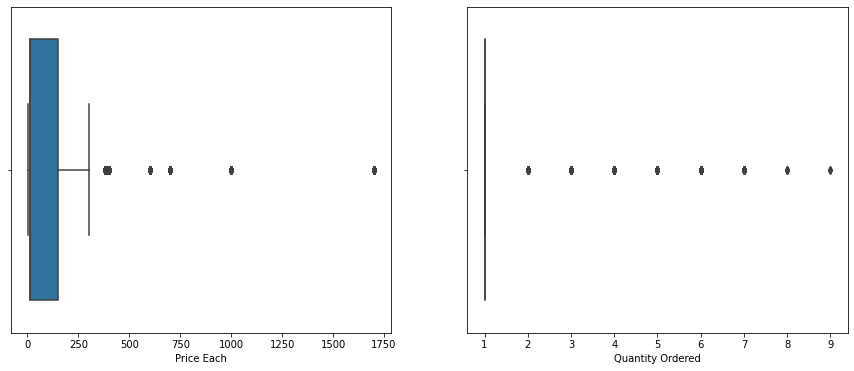

In [15]:
visualize_box_plot()

<p>We notice some outliers in both columns.We need to know whether they are necessary for the further analysis or not<p>


In [16]:
#calculate upper and lower limit
def get_outliers(col:pd.Series):
  upper_limit=col.mean()+3*col.std()
  lower_limit=col.mean()-3*col.std()

  filter=(col<lower_limit)|(col>upper_limit)

  return filter

In [17]:
#outliers of Price Each columns
filter_1=get_outliers(all_df["Price Each"])
all_df[filter_1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
54,248204.0,Macbook Pro Laptop,1.0,1700.0,2019-09-02 18:42:00,"940 Madison St, Seattle, WA 98101"
58,248208.0,Macbook Pro Laptop,1.0,1700.0,2019-09-11 19:30:00,"22 7th St, Portland, ME 04101"
110,248258.0,Macbook Pro Laptop,1.0,1700.0,2019-09-21 09:57:00,"535 2nd St, Los Angeles, CA 90001"
120,248267.0,Macbook Pro Laptop,1.0,1700.0,2019-09-09 18:59:00,"147 Lakeview St, Los Angeles, CA 90001"
130,248277.0,Macbook Pro Laptop,1.0,1700.0,2019-09-28 12:58:00,"391 Hill St, New York City, NY 10001"
...,...,...,...,...,...,...
186578,193839.0,Macbook Pro Laptop,1.0,1700.0,2019-04-05 14:46:00,"984 Sunset St, San Francisco, CA 94016"
186628,193885.0,Macbook Pro Laptop,1.0,1700.0,2019-04-16 08:47:00,"837 6th St, Austin, TX 73301"
186640,193897.0,Macbook Pro Laptop,1.0,1700.0,2019-04-16 19:19:00,"489 Chestnut St, Los Angeles, CA 90001"
186721,193972.0,Macbook Pro Laptop,1.0,1700.0,2019-04-11 16:23:00,"334 5th St, San Francisco, CA 94016"


Take a close look to see what kind of product are mostly considered as outliers for the dataset

In [18]:
all_df[filter_1].Product.unique()

array(['Macbook Pro Laptop'], dtype=object)

All the product in the outlier data set are "Macbook Pro Laptop"

In [19]:
all_df.groupby("Product")["Price Each"].mean().sort_values(ascending=False)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

<p>As wee know <strong>"Macbook Pro Laptops"  are more expensive than others electronic devices</strong></p>
<p>So, it is reasonable and the prices for the laptops are necessary for further analysis </p>

In [20]:
#outliers of Quantity Ordered column
filter_2=get_outliers(all_df["Quantity Ordered"])
all_df[filter_2]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151.0,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
11,248162.0,AAA Batteries (4-pack),3.0,2.99,2019-09-14 12:52:00,"439 Walnut St, Seattle, WA 98101"
37,248187.0,AAA Batteries (4-pack),3.0,2.99,2019-09-07 23:31:00,"173 Elm St, Los Angeles, CA 90001"
55,248205.0,AA Batteries (4-pack),3.0,3.84,2019-09-06 14:09:00,"353 Lake St, Atlanta, GA 30301"
63,248212.0,USB-C Charging Cable,3.0,11.95,2019-09-20 16:34:00,"244 Jefferson St, Boston, MA 02215"
...,...,...,...,...,...,...
186714,193966.0,USB-C Charging Cable,4.0,11.95,2019-04-21 20:35:00,"887 Highland St, New York City, NY 10001"
186736,193987.0,AAA Batteries (4-pack),3.0,2.99,2019-04-21 15:35:00,"359 Forest St, Boston, MA 02215"
186764,194013.0,AAA Batteries (4-pack),3.0,2.99,2019-04-30 22:56:00,"396 Sunset St, Seattle, WA 98101"
186816,194061.0,Lightning Charging Cable,3.0,14.95,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301"


Take a close look to see what kind of product are mostly considered as outliers for the dataset

In [21]:
all_df[filter_2]["Product"].unique()

array(['AA Batteries (4-pack)', 'AAA Batteries (4-pack)',
       'USB-C Charging Cable', 'Lightning Charging Cable',
       'Wired Headphones', 'Bose SoundSport Headphones',
       'Apple Airpods Headphones'], dtype=object)

<p>We can see that from the previous average price for each product dataset that most of these stuffs are cheap and a singel customer could buy more</p>
<p>So, their quantities shouldn't be considered as outliers,too</p>

<p><code>NOTE:</code>For this entier dataframe outliers must be the ones with <strong>high quantity orders</strong> and <strong>expensive</strong> at the same time</p>

In [22]:
#combine two filters
all_df[(filter_1 & filter_2)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


<p><code>ANS:</code>Not outliers:</p>

<hr>
<h2>Handle Missing Data</h2>
<hr>

In [23]:
#is there any Nan left
all_df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

<CODE>No more missing data left</CODE>
<p1>The data is clear and clean now.<u>Ready for further analysis</u></p>

<hr>
<h1>Slight feature Creation<b>(features creation)</b></h1>
<hr>

In [24]:
all_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151.0,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,194090.0,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001"
186846,194091.0,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301"
186847,194092.0,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016"
186848,194093.0,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035"


In [59]:
#function to catagorize price and number of orders
def catagorize_product(org_df:pd.DataFrame):
  new_df=org_df.copy()
  price_cat=pd.qcut(new_df["Price Each"],4,labels=["cheap","affordable","expensive","fancy"])

  bins = pd.IntervalIndex.from_tuples([(0, 2), (2,10)])
  d = dict(zip(bins,["normal","market"]))
  orders_cat=pd.cut(new_df["Quantity Ordered"],bins=bins).map(d)

  return price_cat,orders_cat;

#function to add necessary features
def feature_addition():
  new_df=pd.DataFrame()

  #create month and day of week column
  new_df=all_df.assign(Order_Month=lambda x: x["Order Date"].dt.month_name(),
                Order_day=lambda x: x["Order Date"].dt.day_name())
  
  #create Address,city, zip code column and drop Purchase address column
  new_df=pd.concat([new_df,all_df["Purchase Address"].str.split(",",expand=True)],axis=1)
  new_df.rename(columns={0:"Address",1:"City",2:"Zip_Code"},inplace=True)

  new_df.drop("Purchase Address",axis=1,inplace=True)


  #create categories columns for both price each and quantity ordered features
  new_df["Product_cat"],new_df["Quantity_cat"]=catagorize_product(new_df)
  return new_df;




In [60]:
prepared_df=pd.DataFrame()
prepared_df=feature_addition()

In [61]:
prepared_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order_Month,Order_day,Address,City,Zip_Code,Product_cat,Quantity_cat
0,248151.0,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,September,Tuesday,380 North St,Los Angeles,CA 90001,cheap,market
1,248152.0,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,September,Sunday,511 8th St,Austin,TX 73301,cheap,normal
2,248153.0,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,September,Monday,151 Johnson St,Los Angeles,CA 90001,cheap,normal
3,248154.0,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,September,Friday,355 Hickory St,Seattle,WA 98101,expensive,normal
4,248155.0,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,September,Sunday,125 5th St,Atlanta,GA 30301,cheap,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,194090.0,Google Phone,1.0,600.00,2019-04-08 17:11:00,April,Monday,177 Jackson St,Los Angeles,CA 90001,fancy,normal
186846,194091.0,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,April,Monday,311 Forest St,Austin,TX 73301,cheap,normal
186847,194092.0,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,April,Sunday,347 Sunset St,San Francisco,CA 94016,cheap,normal
186848,194093.0,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,April,Sunday,835 Lake St,Portland,OR 97035,cheap,normal


In [63]:
#save the prepared data as csv file
prepared_df.to_csv("/content/drive/MyDrive/Sales_analysis/Sales_Data/prepared_df.csv",index=False)